In [1]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
%matplotlib inline

In [2]:
df = pd.read_csv('gld_price_data.csv')
print(df.iloc[-1])
df.head()
df.dropna()
df.shape

Date         5/16/2018
SPX        2725.780029
GLD           122.5438
USO            14.4058
SLV            15.4542
EUR/USD       1.182033
Name: 2289, dtype: object


(2290, 6)

In [3]:
df.shape

(2290, 6)

In [4]:
X_date = df['Date']
print(X_date.iloc[-1])
X_noDate = df[['SPX','USO','SLV','EUR/USD']]

5/16/2018


In [5]:
Y = df['GLD']

In [6]:
print(X_date.iloc[-1])
X_date = pd.to_datetime(X_date)
dates = pd.DataFrame()
dates['year'] = X_date.dt.year
dates['month'] = X_date.dt.month
dates['day'] = X_date.dt.day
dates = dates.to_numpy()
print(dates.shape)

5/16/2018
(2290, 3)


In [7]:
Y

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64

In [8]:

X = np.zeros((2290, 7))
print(X.shape)
print(X_noDate.shape)
print(X_date.shape)
print(Y.shape)

(2290, 7)
(2290, 4)
(2290,)
(2290,)


In [9]:
scaler = StandardScaler()

In [10]:
scaler.fit(X_noDate)
X_noDate_transformed = scaler.transform(X_noDate)
print(X_noDate_transformed)

[[-0.39914541  2.38880956 -0.6917197   1.42975293]
 [-0.39914541  2.38368652 -0.67691224  1.45103511]
 [-0.46760428  2.32938091 -0.69355301  1.45864621]
 ...
 [ 2.05926403 -0.89307824 -0.61274655 -0.69876145]
 [ 2.0728668  -0.89461519 -0.63813078 -0.68838269]
 [ 2.06448555 -0.89329341 -0.65305106 -0.77266741]]


In [11]:
rows, cols = X.shape

In [12]:
for i in range(rows):
    for j in range(cols):
        if j ==0 or j == 1 or j == 2:
            X[i][j] = dates[i][j]
        else:
            X[i][j] = X_noDate_transformed[i][j-3]
print(X)

[[ 2.00800000e+03  1.00000000e+00  2.00000000e+00 ...  2.38880956e+00
  -6.91719702e-01  1.42975293e+00]
 [ 2.00800000e+03  1.00000000e+00  3.00000000e+00 ...  2.38368652e+00
  -6.76912236e-01  1.45103511e+00]
 [ 2.00800000e+03  1.00000000e+00  4.00000000e+00 ...  2.32938091e+00
  -6.93553007e-01  1.45864621e+00]
 ...
 [ 2.01800000e+03  5.00000000e+00  1.00000000e+01 ... -8.93078242e-01
  -6.12746551e-01 -6.98761454e-01]
 [ 2.01800000e+03  5.00000000e+00  1.40000000e+01 ... -8.94615186e-01
  -6.38130778e-01 -6.88382686e-01]
 [ 2.01800000e+03  5.00000000e+00  1.60000000e+01 ... -8.93293414e-01
  -6.53051063e-01 -7.72667412e-01]]


In [13]:
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.2, random_state=3)

In [14]:
depth_accuracy_test = []
samples_accuracy_test = []
depth_accuracy_train = []
samples_accuracy_train = []
for sample in (2,3,4,5,10,20,50,100):
    model = RandomForestRegressor(min_samples_split=sample, random_state=0)
    model.fit(X_train, y_train)
    train_predictions = model.predict(X_train)
    accuracy = mean_squared_error(train_predictions, y_train)
    samples_accuracy_train.append(accuracy)
    test_predictions = model.predict(X_test)
    accuracy = mean_squared_error(test_predictions, y_test)
    samples_accuracy_test.append(accuracy)
for depth in (2,3,4,5,10,20,50,100):
    model = RandomForestRegressor(max_depth=depth, random_state=0)
    model.fit(X_train, y_train)
    train_predictions = model.predict(X_train)
    accuracy = mean_squared_error(train_predictions, y_train)
    depth_accuracy_train.append(accuracy)
    test_predictions = model.predict(X_test)
    accuracy = mean_squared_error(test_predictions, y_test)
    depth_accuracy_test.append(accuracy)

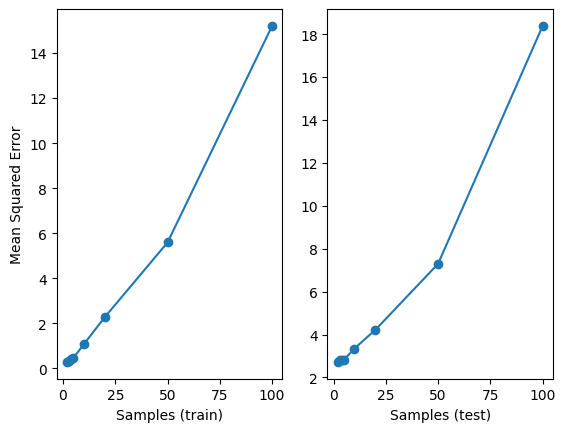

In [15]:
plt.subplot(1,2,1)
plt.plot((2,3,4,5,10,20,50,100), samples_accuracy_train, marker='o')
plt.xlabel('Samples (train)')
plt.ylabel('Mean Squared Error')

plt.subplot(1,2,2)
plt.plot((2,3,4,5,10,20,50,100), samples_accuracy_test, marker='o')
plt.xlabel('Samples (test)')

plt.show()

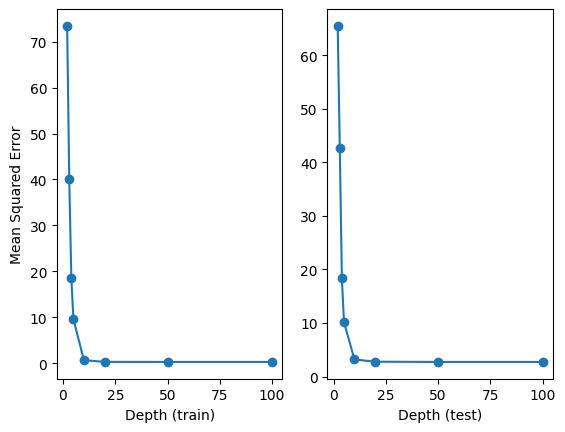

In [16]:
plt.subplot(1,2,1)
plt.plot((2,3,4,5,10,20,50,100), depth_accuracy_train, marker='o')
plt.xlabel('Depth (train)')
plt.ylabel('Mean Squared Error')

plt.subplot(1,2,2)
plt.plot((2,3,4,5,10,20,50,100), depth_accuracy_test, marker='o')
plt.xlabel('Depth (test)')

plt.show()

In [17]:
model = RandomForestRegressor(min_samples_split=2, max_depth=10, random_state=0)
model.fit(X_train, y_train)
predictions = model.predict(X_test)
print(mean_squared_error(predictions, y_test))

3.1862216188484456


In [19]:
with open('model.pkl', 'wb') as file:
    pickle.dump(model, file)
with open('scaler.pkl','wb') as s:
    pickle.dump(scaler, s)